In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи
## Классификация доходов
Датасет содержит набор данных о индивидуальном доходе, демографических и некоторых финансовых параметрах физических лицах компании, выдающей субсидии.
Задачей классификации для данного датасета является определение доходов физ.лиц за счет уменьшения кол-ва переменных для изучения, не жертвуя большой точностью, с целью упрощения планирования компанией расходов на субсидии.

# 1. Загрузка данных 

In [2]:
dataset = "income.csv"
data_raw = pd.read_csv(dataset)

In [3]:
data_raw

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


Категориальный признак `SalStat` приведем к бинарному виду, заменив "less than or equal to 50,000" на `0`, а "greater than 50,000" на `1`.

In [4]:
data_raw["SalStat"].dtype

dtype('O')

In [5]:
data_raw["SalStat"] = np.where(data_raw["SalStat"] == " less than or equal to 50,000", 0, 1)

# 2. Вычисление основных характеристик

In [6]:
data_raw.describe()

,age,capitalgain,capitalloss,hoursperweek,SalStat
count,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850,0.240634
std,13.662085,7298.596271,401.594301,12.345285,0.427475
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


Вычислим и выведем матрицу корреляции, для определния связи между признаками

In [7]:
corr_mat = data_raw.corr()
corr_mat

,age,capitalgain,capitalloss,hoursperweek,SalStat
age,1.000000,0.077490,0.057282,0.068299,0.233601
capitalgain,0.077490,1.000000,-0.031499,0.079112,0.222703
capitalloss,0.057282,-0.031499,1.000000,0.053106,0.149353
hoursperweek,0.068299,0.079112,0.053106,1.000000,0.230448
SalStat,0.233601,0.222703,0.149353,0.230448,1.000000


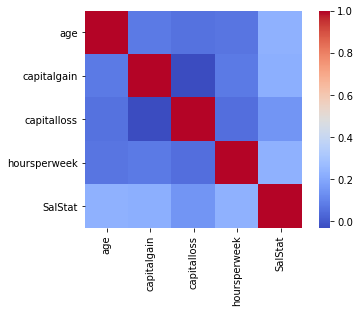

In [8]:
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

Видим

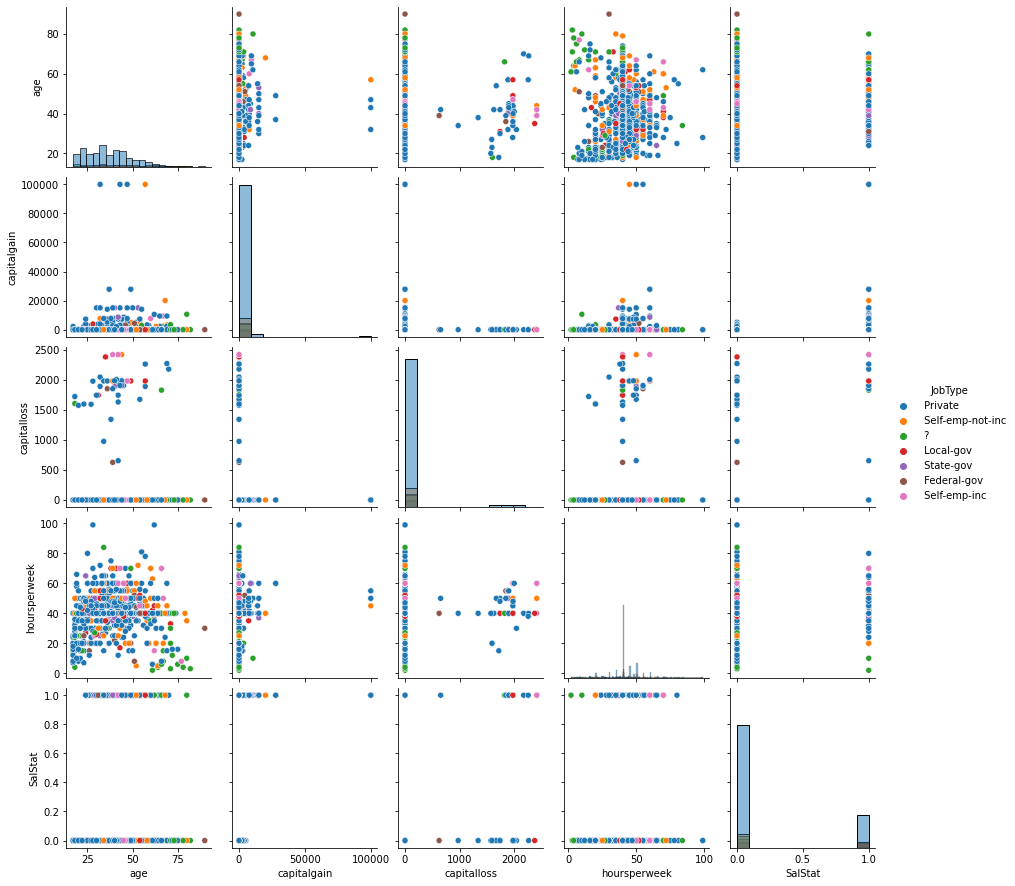

In [9]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue="JobType", diag_kind="hist")
pass

# 3. Обработка пропущенных значений

In [10]:
data_raw.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

Пропущеннных значений нет.

# 4 Обработка категориальных признаков

Обрабатываем категориальные признаки

In [11]:
data_raw["JobType"] = data_raw["JobType"].astype("category")
data_raw["JobType"].dtype

CategoricalDtype(categories=[' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
                  ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
                  ' State-gov', ' Without-pay'],
, ordered=False)

In [12]:
data_raw["EdType"] = data_raw["EdType"].astype("category")
data_raw["EdType"].dtype

CategoricalDtype(categories=[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
                  ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc',
                  ' Bachelors', ' Doctorate', ' HS-grad', ' Masters',
                  ' Preschool', ' Prof-school', ' Some-college'],
, ordered=False)

In [13]:
data_raw["maritalstatus"] = data_raw["maritalstatus"].astype("category")
data_raw["maritalstatus"].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False)

In [14]:
data_raw["occupation"] = data_raw["occupation"].astype("category")
data_raw["occupation"].dtype

CategoricalDtype(categories=[' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
                  ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
                  ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
                  ' Prof-specialty', ' Protective-serv', ' Sales',
                  ' Tech-support', ' Transport-moving'],
, ordered=False)

In [15]:
data_raw["relationship"] = data_raw["relationship"].astype("category")
data_raw["relationship"].dtype

CategoricalDtype(categories=[' Husband', ' Not-in-family', ' Other-relative',
                  ' Own-child', ' Unmarried', ' Wife'],
, ordered=False)

In [16]:
data_raw["race"] = data_raw["race"].astype("category")
data_raw["race"].dtype

CategoricalDtype(categories=[' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black',
                  ' Other', ' White'],
, ordered=False)

In [17]:
data_raw["gender"] = data_raw["gender"].astype("category")
data_raw["gender"].dtype

CategoricalDtype(categories=[' Female', ' Male'], ordered=False)

In [18]:
data_raw["nativecountry"] = data_raw["nativecountry"].astype("category")
data_raw["nativecountry"].dtype

CategoricalDtype(categories=[' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
                  ' Dominican-Republic', ' Ecuador', ' El-Salvador',
                  ' England', ' France', ' Germany', ' Greece', ' Guatemala',
                  ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong',
                  ' Hungary', ' India', ' Iran', ' Ireland', ' Italy',
                  ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua',
                  ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines',
                  ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland',
                  ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
                  ' United-States', ' Vietnam', ' Yugoslavia'],
, ordered=False)

In [19]:
data_raw.describe(include=["category"])

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry
count,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,10368,14692,4038,12947,27430,21370,29170


In [20]:
data = pd.get_dummies(data_raw)

# 5. Нормализация

Произведем нормализацию для всех числовых признаков.

In [21]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data.describe()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ ?,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
count,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,...,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,0.295603,0.010644,0.019913,0.402223,0.240634,0.056570,0.029489,0.064638,0.000219,0.696917,...,0.001157,0.003565,0.000375,0.002502,0.001595,0.000563,0.000594,0.912190,0.002095,0.000500
std,0.187152,0.072987,0.092193,0.125972,0.427475,0.231023,0.169175,0.245890,0.014794,0.459598,...,0.033996,0.059602,0.019368,0.049955,0.039904,0.023719,0.024369,0.283023,0.045726,0.022363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.424658,0.000000,0.000000,0.448980,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Классификация

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
X= data.drop(["SalStat"], 1)
y = data["SalStat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1122)

In [24]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.8764419735927728, Test: 0.8255159474671669'

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.8630646282140375, Test: 0.8286429018136335'

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.8586518415566365, Test: 0.8277048155096935'

# 7. Вывод

* Алгоритм демонстрирует среднюю точность, что, вероятно, связано с несбалансированностью классов.
* При увеличение числа соседей в алгор. ближайших соседей точность растет, след. можно подобрать значение для макс. точности